In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import optimizers

#To ensure that a GPU version TensorFlow process only runs on CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

2.7.0


In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
#Reduce the size of the images to reduce the model size. 
#Rescale the image sizes to between 0 and 1
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)
test_img_datagen = ImageDataGenerator(rescale=1./255)

# class_mode = 'categorical' means the labels are 1-hot encoding
train_set = train_img_datagen.flow_from_directory(
    'localfoodclassification/dataset/Dataset/train',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

val_set = val_img_datagen.flow_from_directory(
    'localfoodclassification/dataset/Dataset/val',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')


test_set = test_img_datagen.flow_from_directory(
    'localfoodclassification/test',
    target_size=(32,32),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')


Found 1908 images belonging to 3 classes.
Found 93 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


In [4]:
cnn_model = Sequential()
#1st layer with 64 filters -- Any number. kernel_size -- any number. input_shape -- 32,32,3
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)))
#2nd layer which is similar to 1st layer except wo the input shape
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#3rd layer. Downsample images to 2 by 2
cnn_model.add(MaxPooling2D(2,2))
#Drop 40 percent of the neurons along with the weights
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

#After covolution, flatten
cnn_model.add(Flatten())

#Add the fully connected ANN with 1024 neurons
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))
#Output layer. units=3 cos there are 3 classes. Softmax more for classification
cnn_model.add(Dense(units = 3, activation = 'softmax'))

In [5]:
#Use categorical_crossentropy for multi-class classification
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), 
                metrics = ['accuracy'])

In [6]:
#model_info = model.fit(train_set,batch_size=32, validation_data= val_set, epochs=5, shuffle=True)
#Explore --> Try to increase the epochs

#history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)
#model_info = cnn_model.fit_generator(train_set,validation_data=val_set,epochs=10, steps_per_epoch=len(train_set), validation_steps=len(val_set), shuffle = True )

#Perform the actual training of the model
model_info = cnn_model.fit(train_set, batch_size=32, validation_data=val_set, epochs=25, shuffle=True)

cnn_model.summary()

Epoch 1/25
60/60 [==============================] - 23s 362ms/step - loss: 1.0630 - accuracy: 0.4387 - val_loss: 1.0797 - val_accuracy: 0.3548
Epoch 2/25
60/60 [==============================] - 22s 362ms/step - loss: 0.9296 - accuracy: 0.5545 - val_loss: 1.0588 - val_accuracy: 0.4409
Epoch 3/25
60/60 [==============================] - 21s 347ms/step - loss: 0.8312 - accuracy: 0.6326 - val_loss: 0.9837 - val_accuracy: 0.5484
Epoch 4/25
60/60 [==============================] - 21s 347ms/step - loss: 0.7204 - accuracy: 0.7096 - val_loss: 0.9747 - val_accuracy: 0.6022
Epoch 5/25
60/60 [==============================] - 21s 347ms/step - loss: 0.6795 - accuracy: 0.7102 - val_loss: 0.9566 - val_accuracy: 0.6237
Epoch 6/25
60/60 [==============================] - 21s 353ms/step - loss: 0.6173 - accuracy: 0.7510 - val_loss: 0.8021 - val_accuracy: 0.6237
Epoch 7/25
60/60 [==============================] - 21s 343ms/step - loss: 0.5760 - accuracy: 0.7673 - val_loss: 0.8264 - val_accuracy: 0.6237

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


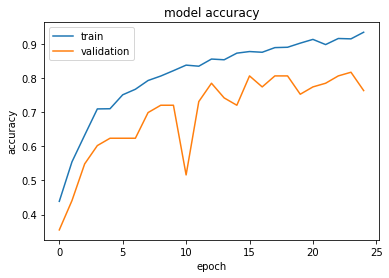

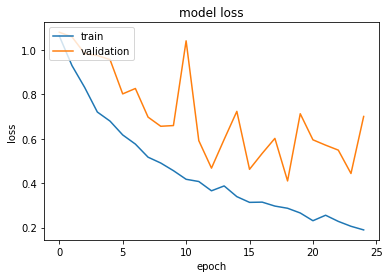

In [7]:
# list all data in history
print(model_info.history.keys())

# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
cnn_model.save('LocalFoodRGBWorking.h5')

In [9]:
scores = cnn_model.evaluate_generator(test_set)

print("Test Accuracy: {:.3f}".format(scores[1]))

C:\Users\WANFUA~1\AppData\Local\Temp/ipykernel_3564/3785613087.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = cnn_model.evaluate_generator(test_set)


Test Accuracy: 0.900


In [10]:
from keras.models import load_model
model = load_model('LocalFoodRGBWorking.h5')

index: 1
Prediction - Hokkein Noodles
prediction: [[0.14876904 0.8266152  0.02461571]]


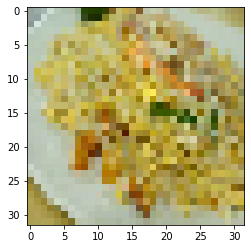

In [12]:
from keras.models import load_model
from keras.preprocessing import image

img_width, img_height = 32, 32

category = ["Chicken Rice", "Hokkein Noodles","Ice Kacang"]

#predicting single image
#image_path = "localfoodclassification/test/ice_kacang/images.jpg"
#image_path = "localfoodclassification/test/chicken_rice/images13.jpg"
image_path = "localfoodclassification/test/hokkien_noodles/hokkein_noodle_5.jpg"
new_img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

prediction = model.predict(img)
            
index = np.argmax(prediction)
print("index:", index)
print("Prediction - {}".format(category[index]))
plt.imshow(new_img)
print("prediction:", prediction)

In [13]:
import os

category={
    0: ['chicken_rice','Chicken Rice'], 1: ['hokkien_noodles', 'Hokkien Prawn Noodles'], 2: ['ice_kacang','Ice Kacang']
    
}

def predict_dir(filedir,model):
    #cols=5
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    index = 0
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(32, 32))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)
        index=0

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

Accuracy of Test : 1.00 (5/5)


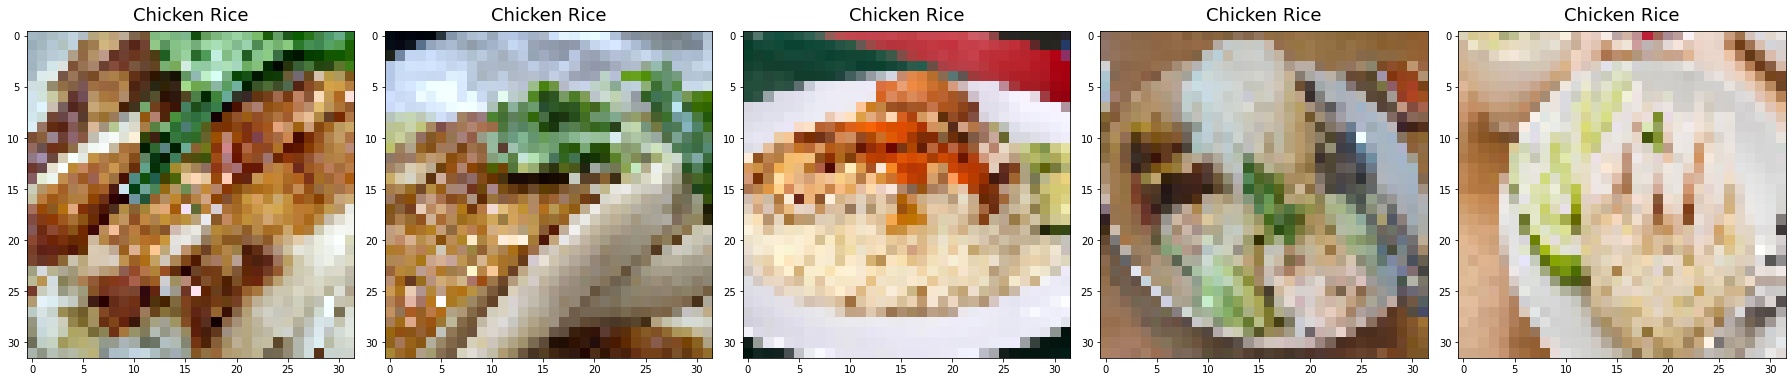

In [14]:
predict_dir("localfoodclassification/test/chicken_rice", model)

Accuracy of Test : 1.00 (3/3)


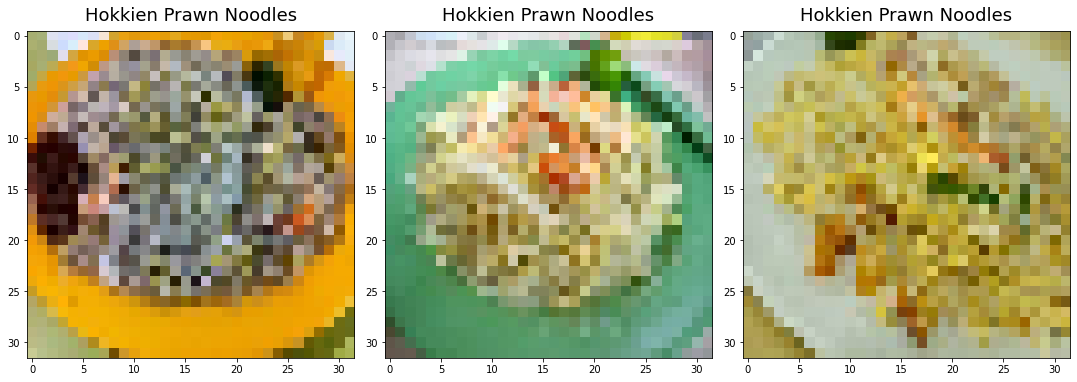

In [15]:
predict_dir("localfoodclassification/test/hokkien_noodles", model)

Accuracy of Test : 0.50 (1/2)


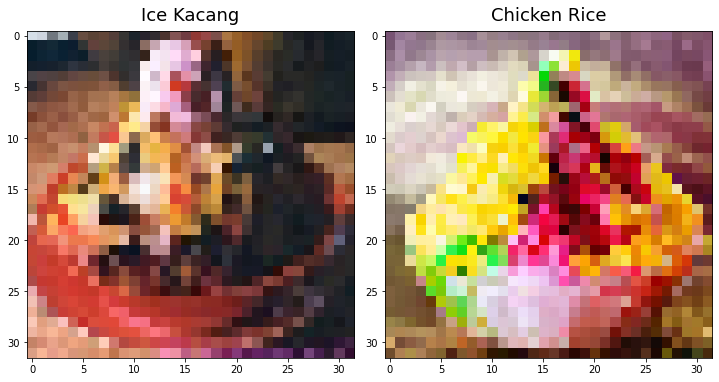

In [16]:
predict_dir("localfoodclassification/test/ice_kacang", model)

In [18]:
predict_x=model.predict(test_set)
predicted_classes = predict_x.argmax(1)

print("test_set:", test_set)
print("predict_x:", predict_x)
print("predicted_classes:", predicted_classes)

test_set: <keras.preprocessing.image.DirectoryIterator object at 0x0000022C0060D3D0>
predict_x: [[6.3397646e-02 9.3132466e-01 5.2776895e-03]
 [9.0211815e-01 8.8423960e-02 9.4578676e-03]
 [9.4560194e-01 5.2488346e-02 1.9096792e-03]
 [8.2536496e-02 3.0686074e-01 6.1060274e-01]
 [9.6718031e-01 3.2374471e-02 4.4522632e-04]
 [6.8987012e-01 2.8429745e-02 2.8170016e-01]
 [9.9861014e-01 1.3086085e-03 8.1139820e-05]
 [1.4876895e-01 8.2661539e-01 2.4615694e-02]
 [3.4925449e-01 6.4720827e-01 3.5372716e-03]
 [9.9877793e-01 1.1817227e-03 4.0358580e-05]]
predicted_classes: [1 0 0 2 0 0 0 1 1 0]
